In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Delivery_time -> Predict delivery time using sorting tim

In [2]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\delivery_time.csv")

In [3]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [11]:
df.rename(columns= {'Delivery Time' : 'DeliveryTime', 'Sorting Time':'SortingTime'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']= 250

<AxesSubplot:>

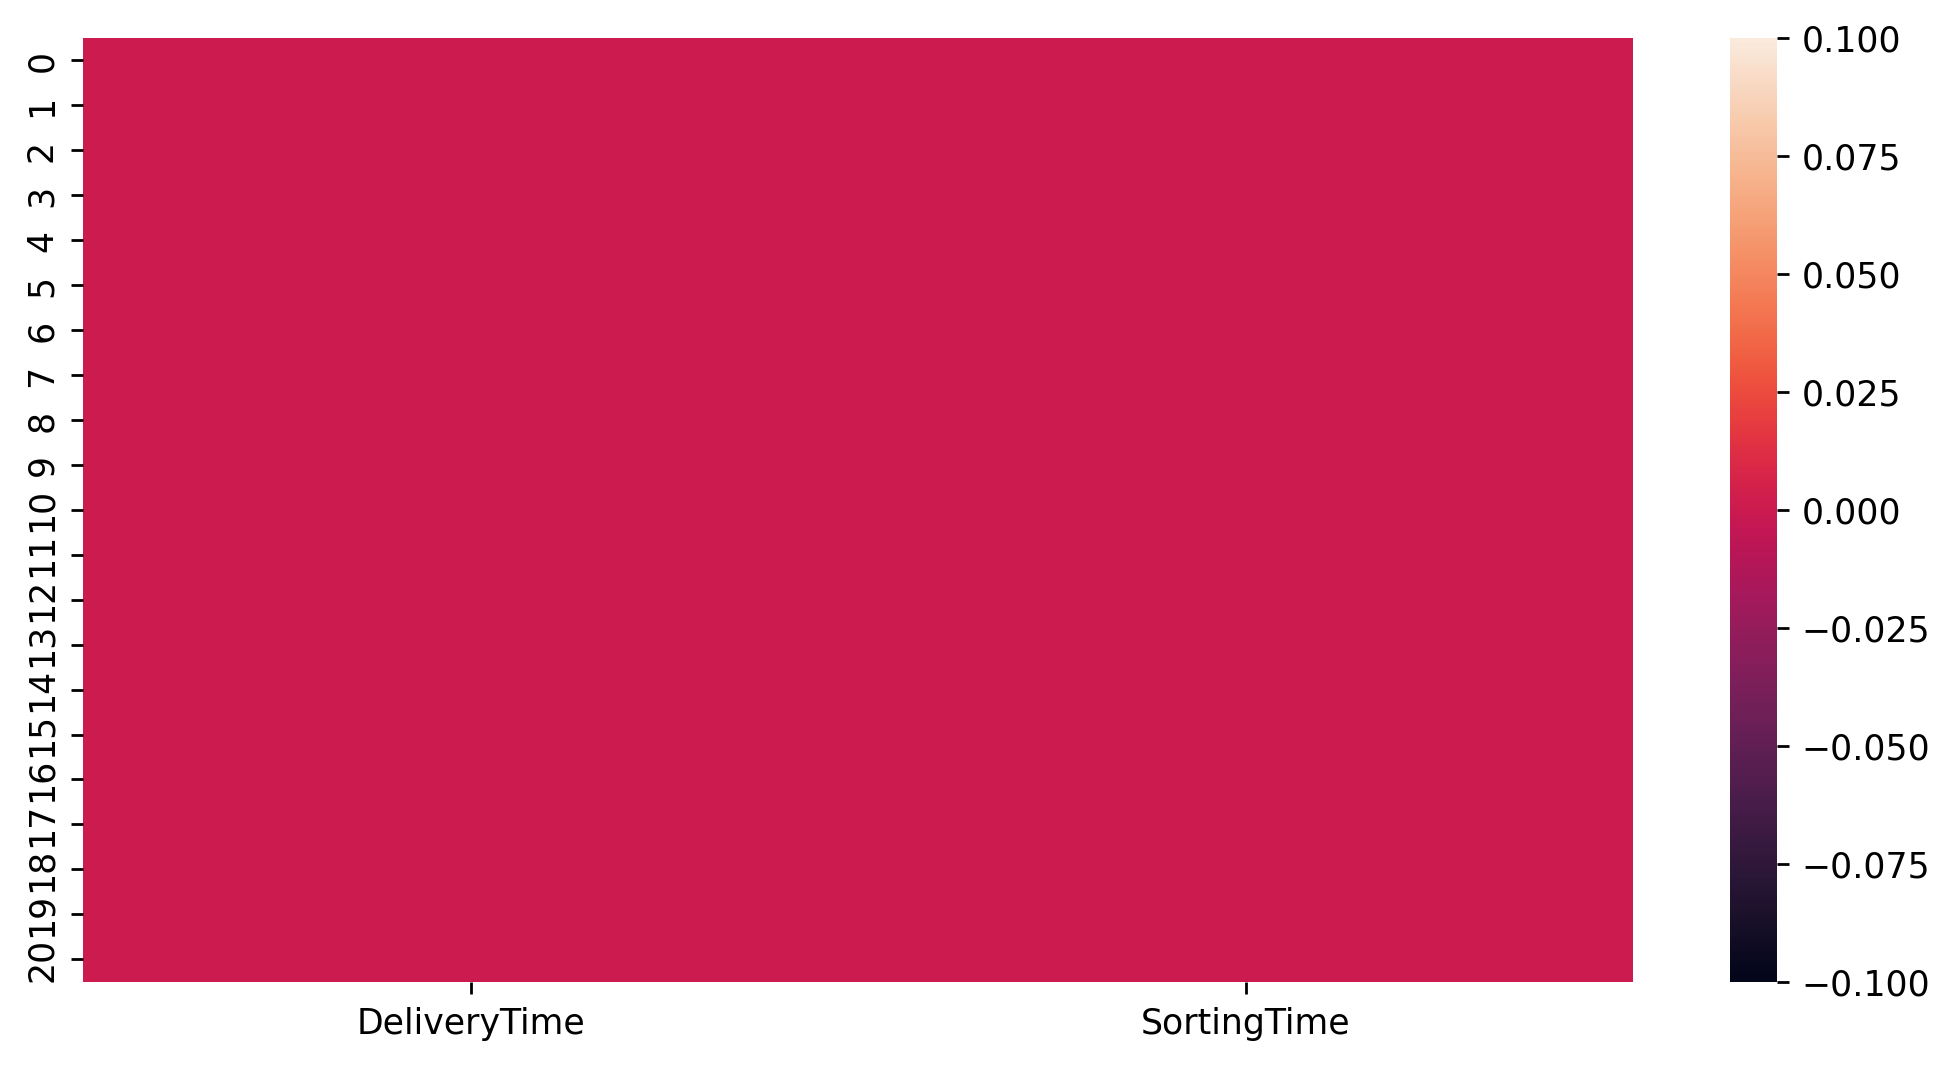

In [18]:
sns.heatmap(df.isna())

In [14]:
#There is no any null value in table

In [26]:
df.duplicated().sum()

0

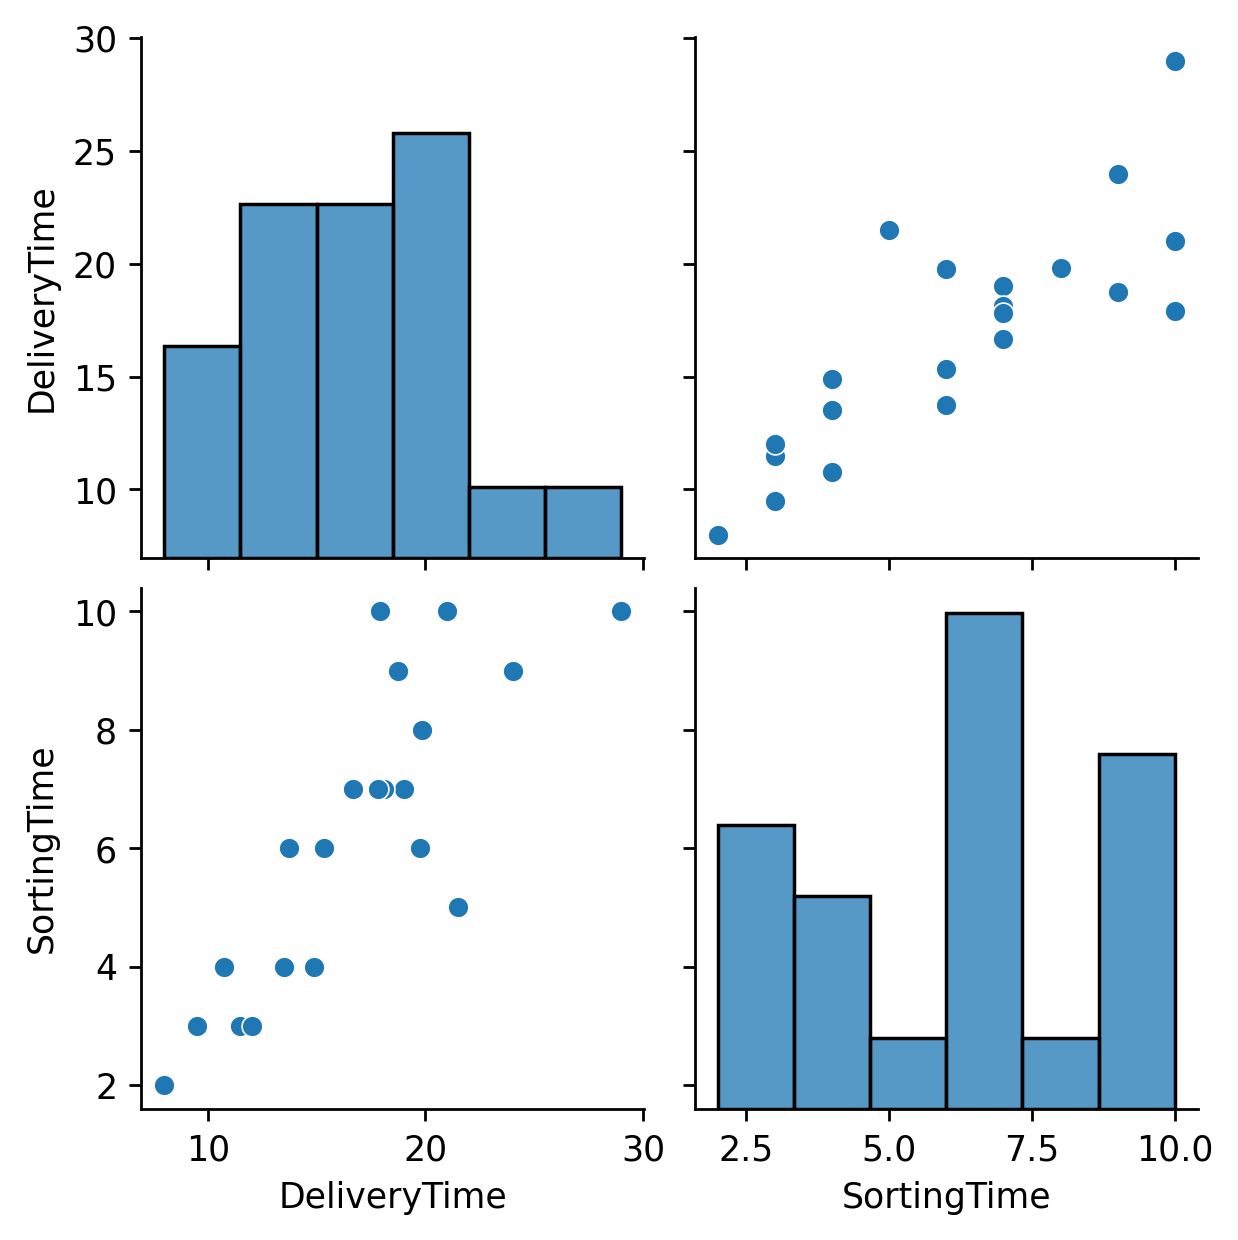

In [24]:
sns.pairplot(df);

In [28]:
# we can see in above plot, there is positive correlation in DeliveryTime & SortingTime which is good for our model

In [29]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


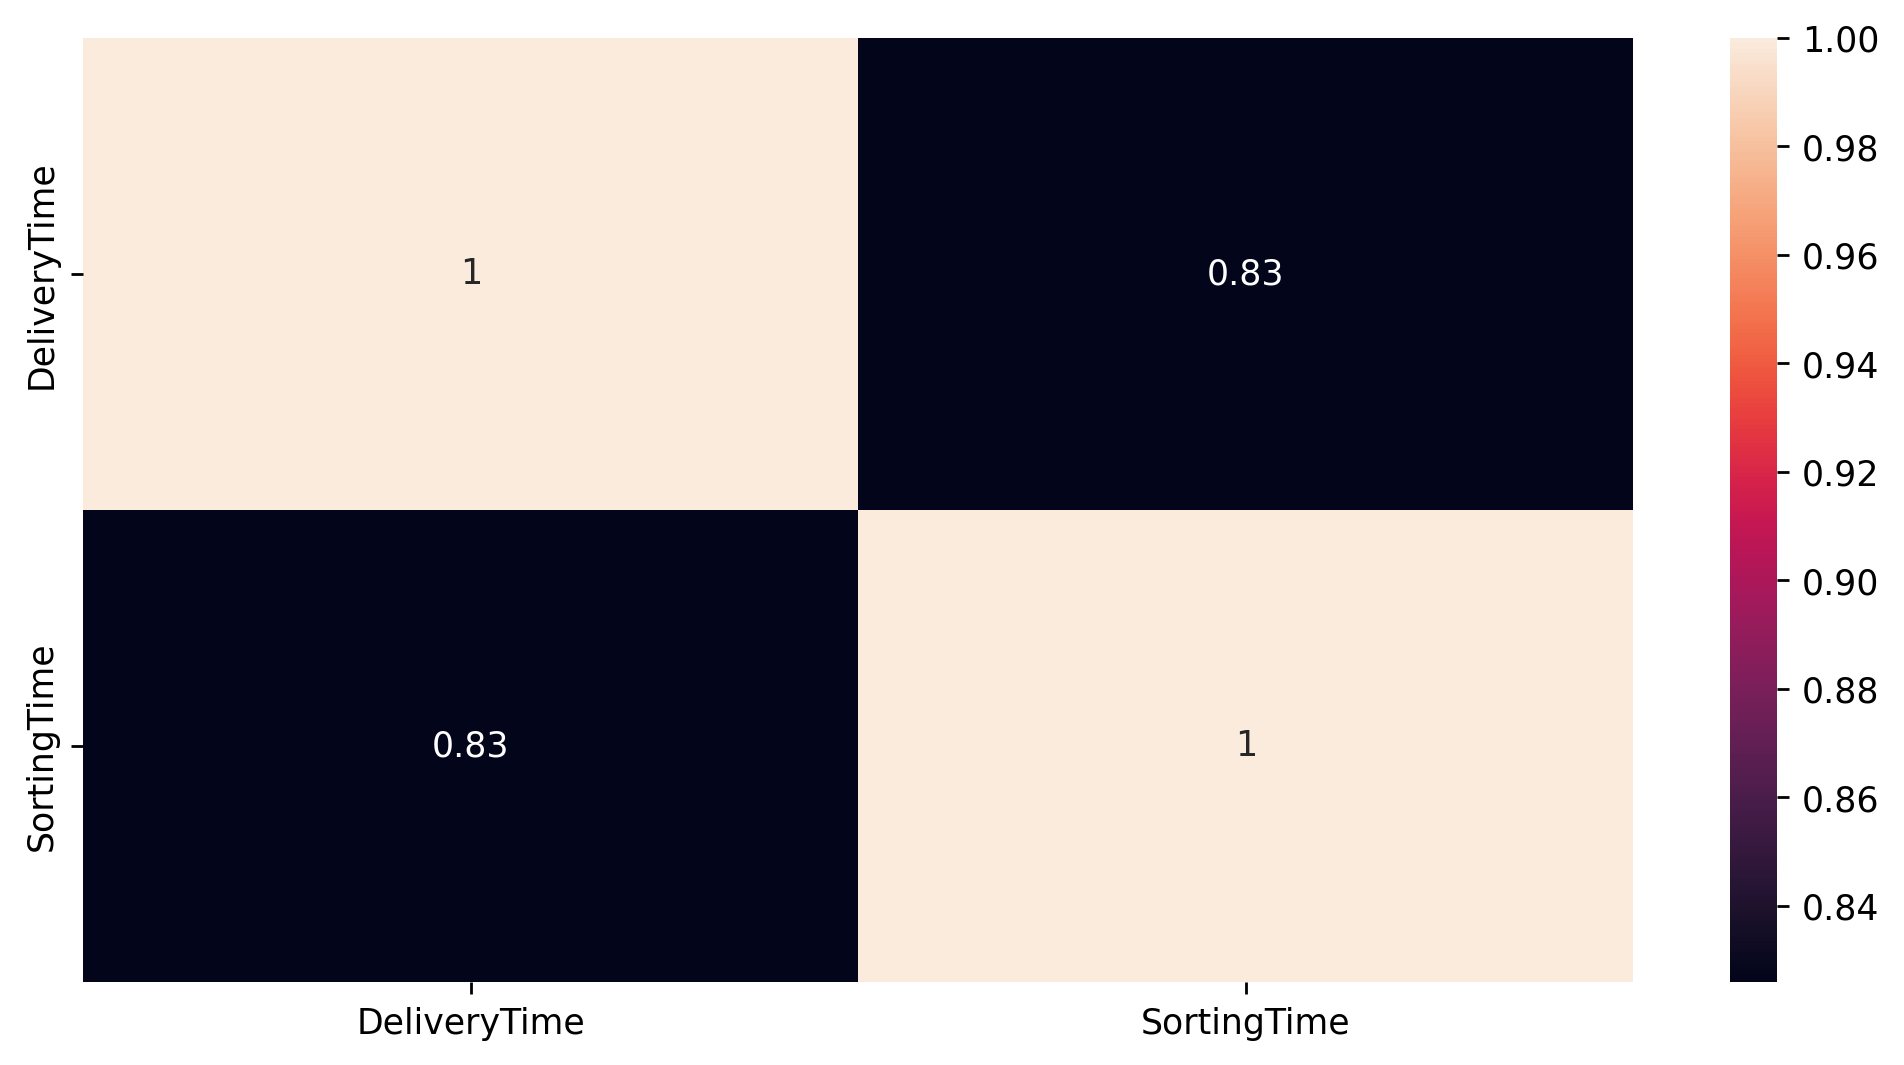

In [30]:
sns.heatmap(df.corr(), annot= True);

In [31]:
import statsmodels.formula.api as smf

In [32]:
model = smf.ols('DeliveryTime~SortingTime', data = df).fit()

In [34]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [59]:
pre = model.predict(df['SortingTime'])

In [62]:
pd.DataFrame({'predict':pre, 'actual': df.DeliveryTime})

,predict,actual
0,23.072933,21.00
1,13.178814,13.50
2,16.476853,19.75
3,21.423913,24.00
4,23.072933,29.00
5,16.476853,15.35
6,18.125873,19.00
7,11.529794,9.50
8,23.072933,17.90
9,21.423913,18.75


In [64]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

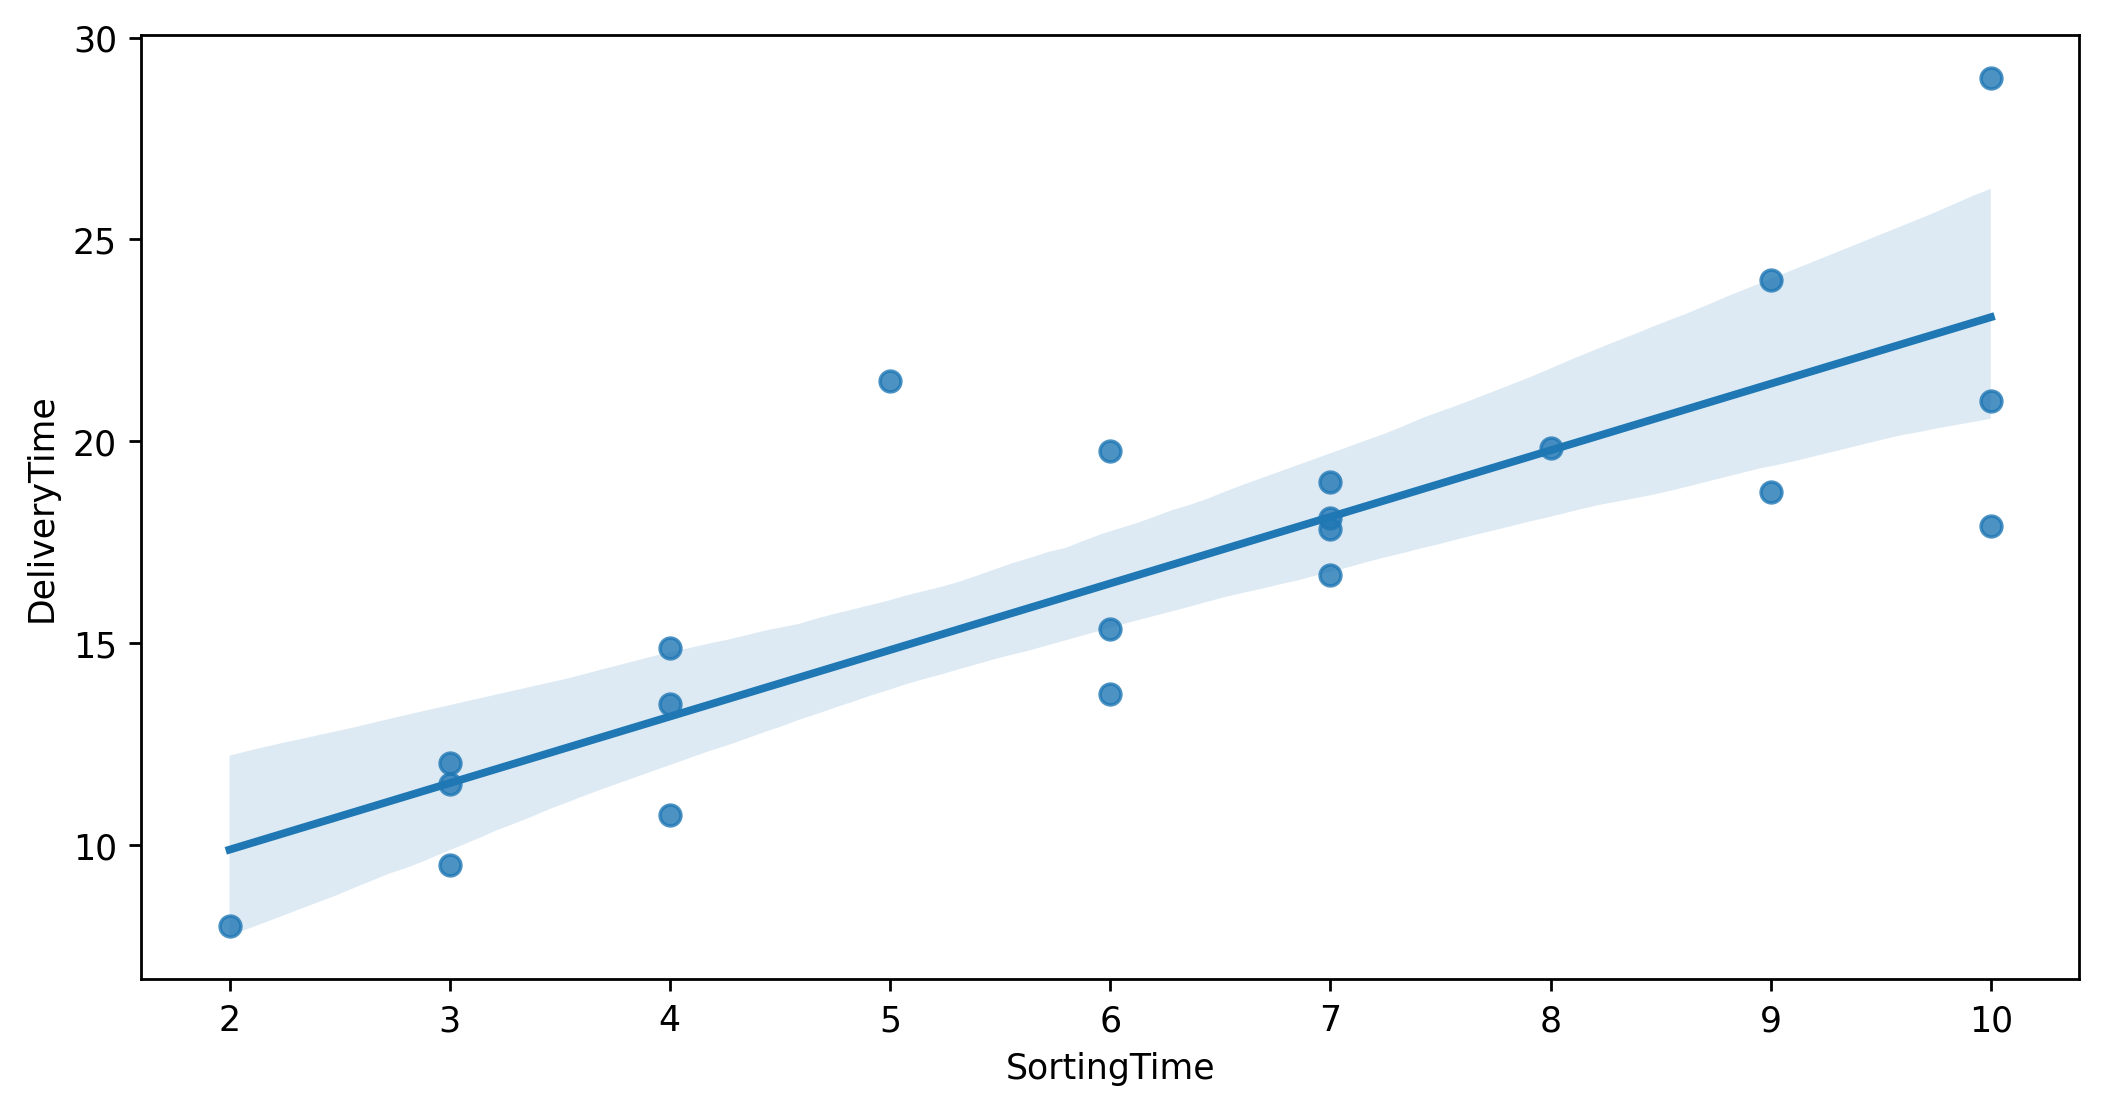

In [66]:
sns.regplot(x='SortingTime', y = 'DeliveryTime', data = df);

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        15:49:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#From the p-values we can conclude that value of intercept and sortingtime are correct.
#r2 value is 68% which is not good 

# Log Transformation

In [71]:
df['log_sort']= np.log(df.SortingTime)

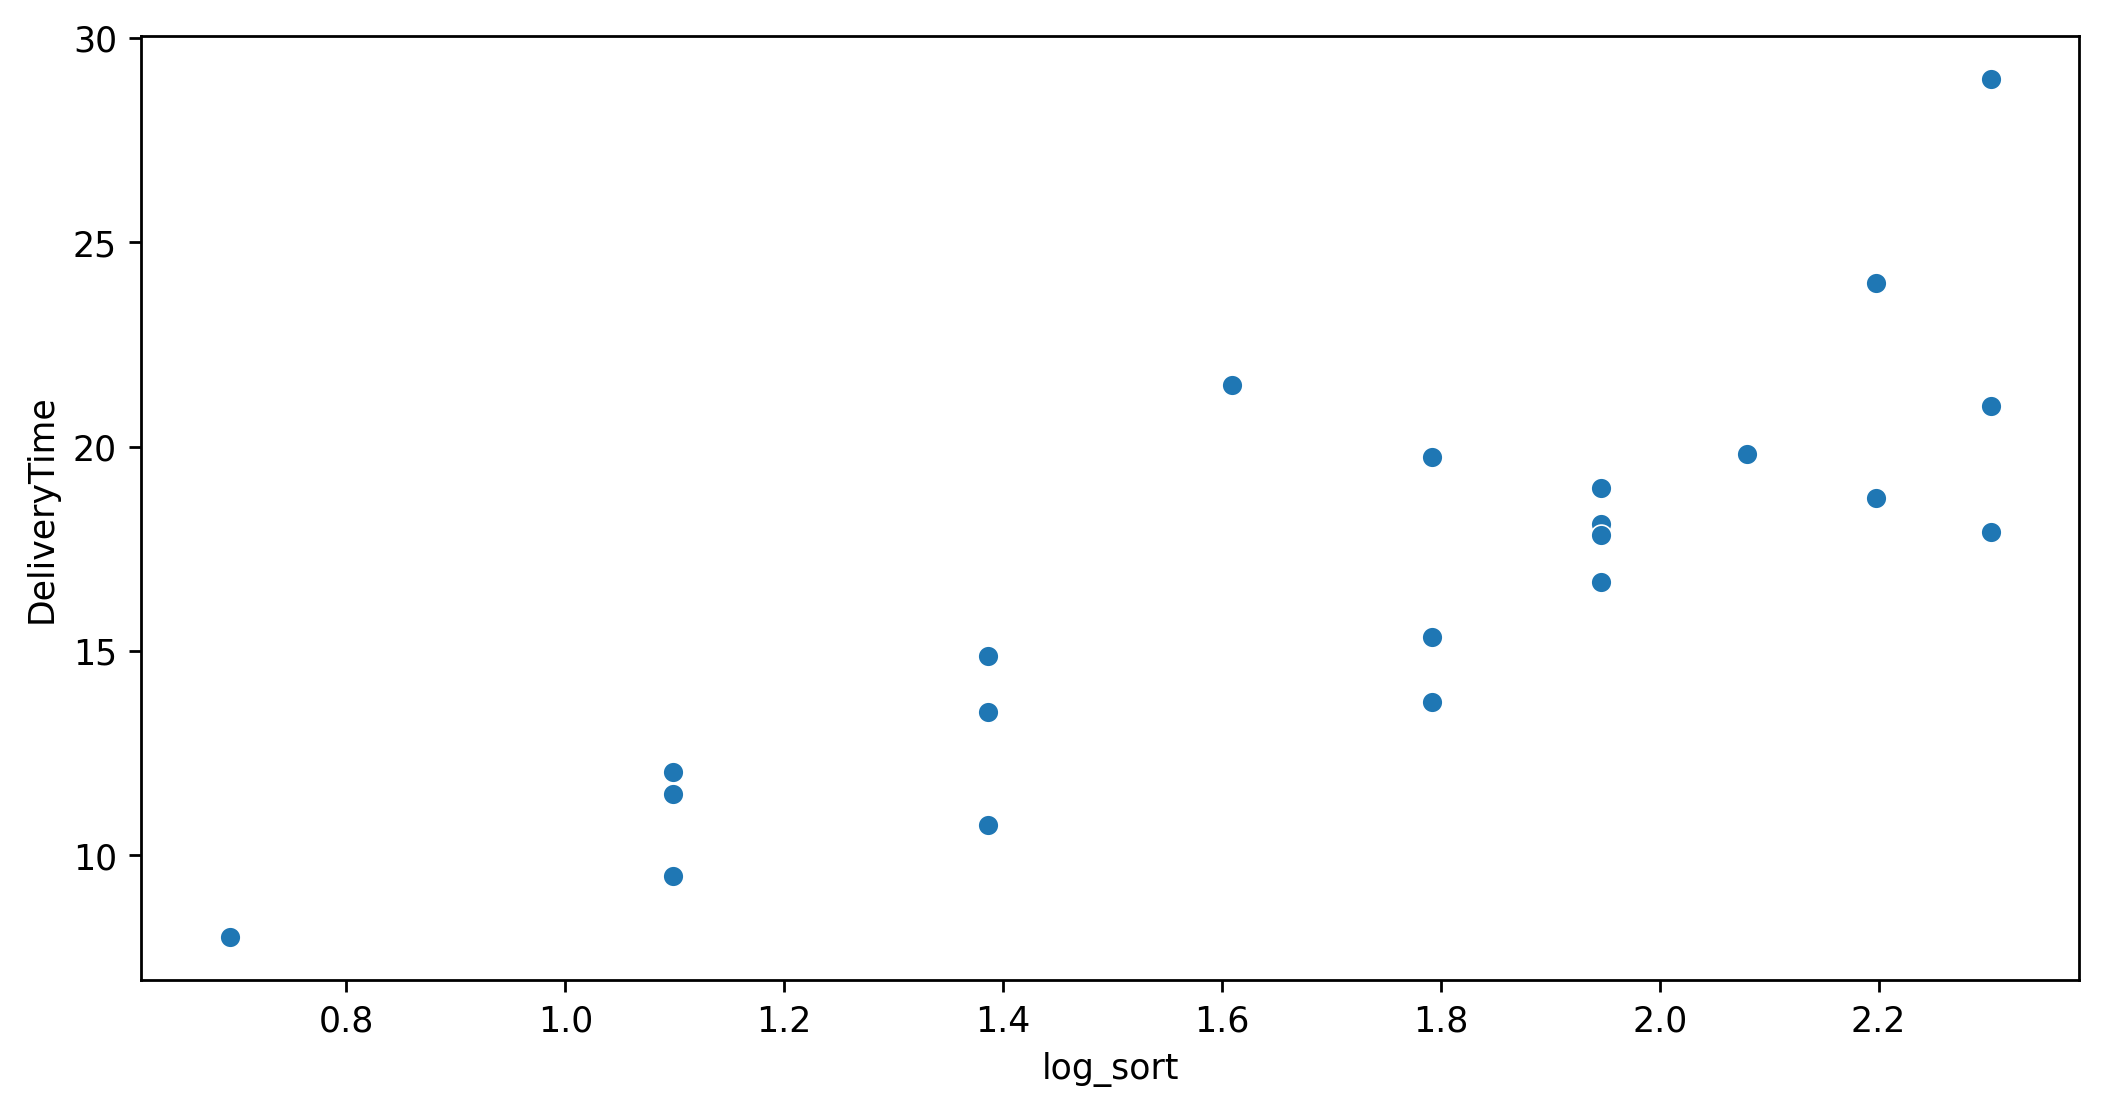

In [73]:
sns.scatterplot(x =df['log_sort'], y = df['DeliveryTime'], data = df );

In [74]:
model1 = smf.ols('DeliveryTime~np.log(df.SortingTime)', data = df).fit()

In [75]:
model1.params

Intercept                 1.159684
np.log(df.SortingTime)    9.043413
dtype: float64

In [77]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        15:55:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(df.SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#r2 value is 69% which is not good 

In [79]:
df['sqrSort']= df['SortingTime']*2

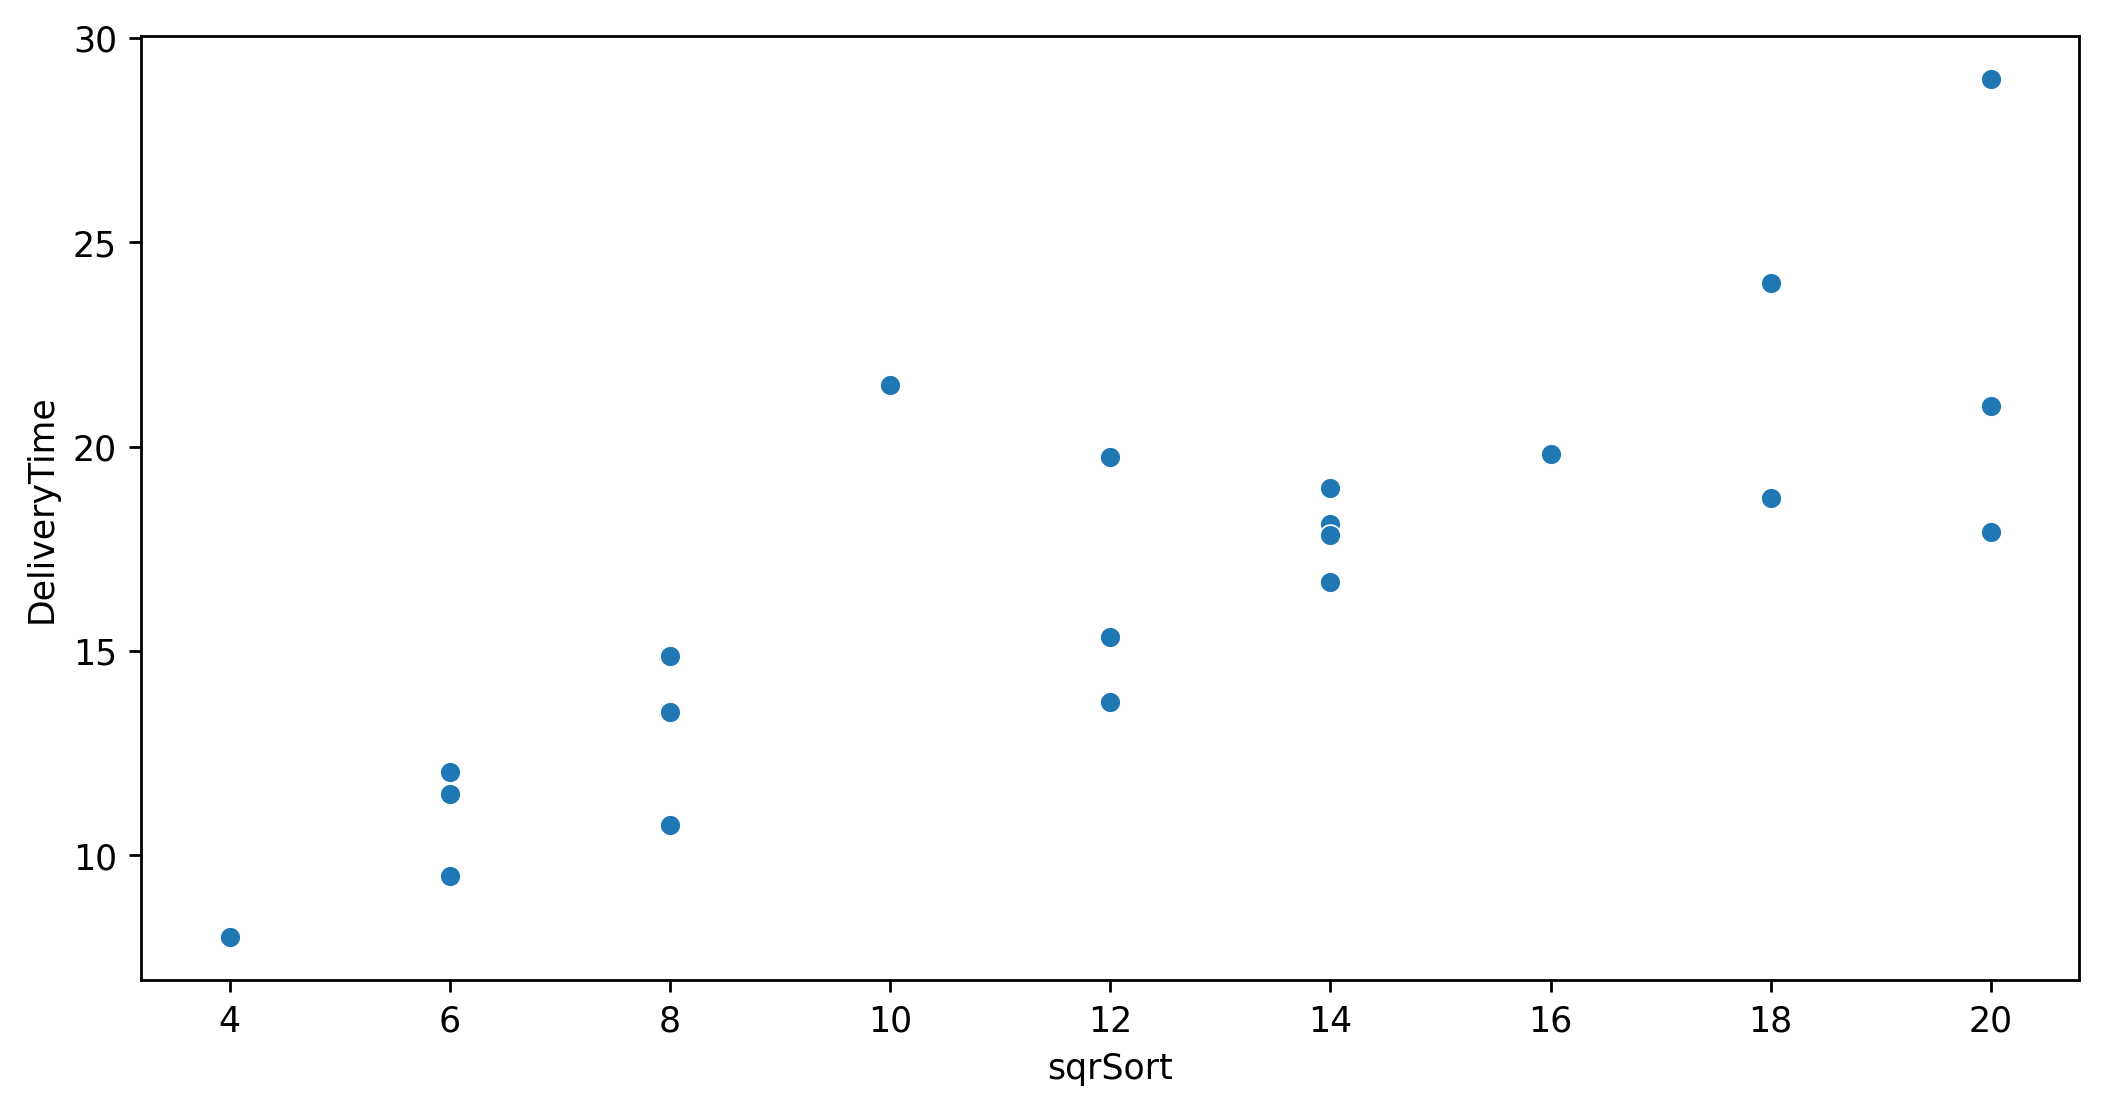

In [80]:
sns.scatterplot(x =df['sqrSort'], y = df['DeliveryTime'], data = df );

In [82]:
model1 = smf.ols('DeliveryTime~sqrSort', data = df).fit()

In [83]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        15:59:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sqrSort        0.8245      0.129      6.387      0.000       0.554       1.095
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         36.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
#log transform on both variable 

In [94]:
df['log_de'] = np.log(df.DeliveryTime)
df['log_sort']= np.log(df.SortingTime)

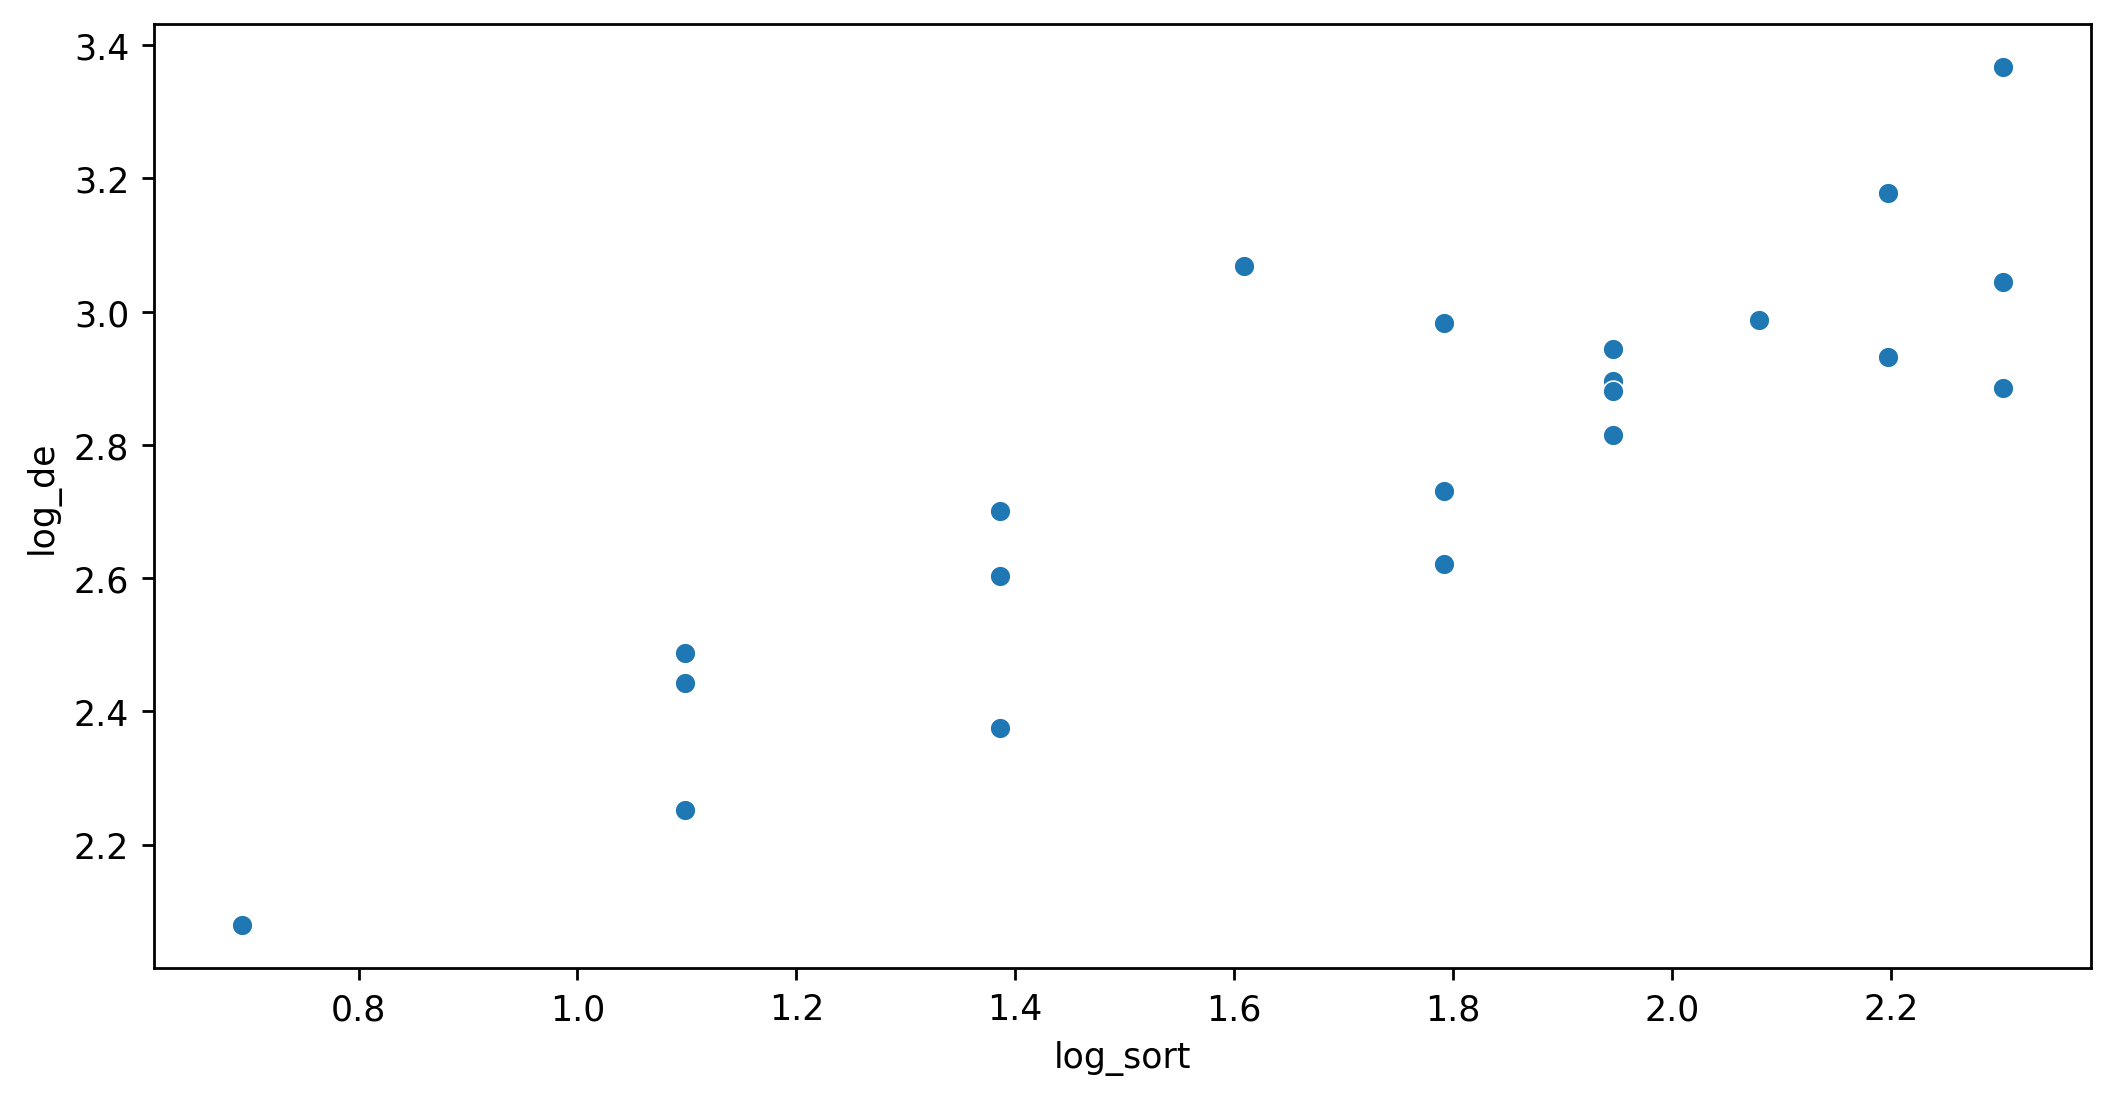

In [95]:
sns.scatterplot(x = df['log_sort'], y =df['log_de'],data = df);

In [91]:
model1 = smf.ols('np.log(df.DeliveryTime)~np.log(df.SortingTime)', data = df).fit()

In [92]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(df.DeliveryTime)   R-squared:                       0.772
Model:                                 OLS   Adj. R-squared:                  0.760
Method:                      Least Squares   F-statistic:                     64.39
Date:                     Thu, 15 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                             22:39:09   Log-Likelihood:                 10.291
No. Observations:                       21   AIC:                            -16.58
Df Residuals:                           19   BIC:                            -14.49
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.7420      0.133     13.086      0.000       1.463       2.021
np.log(df.SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

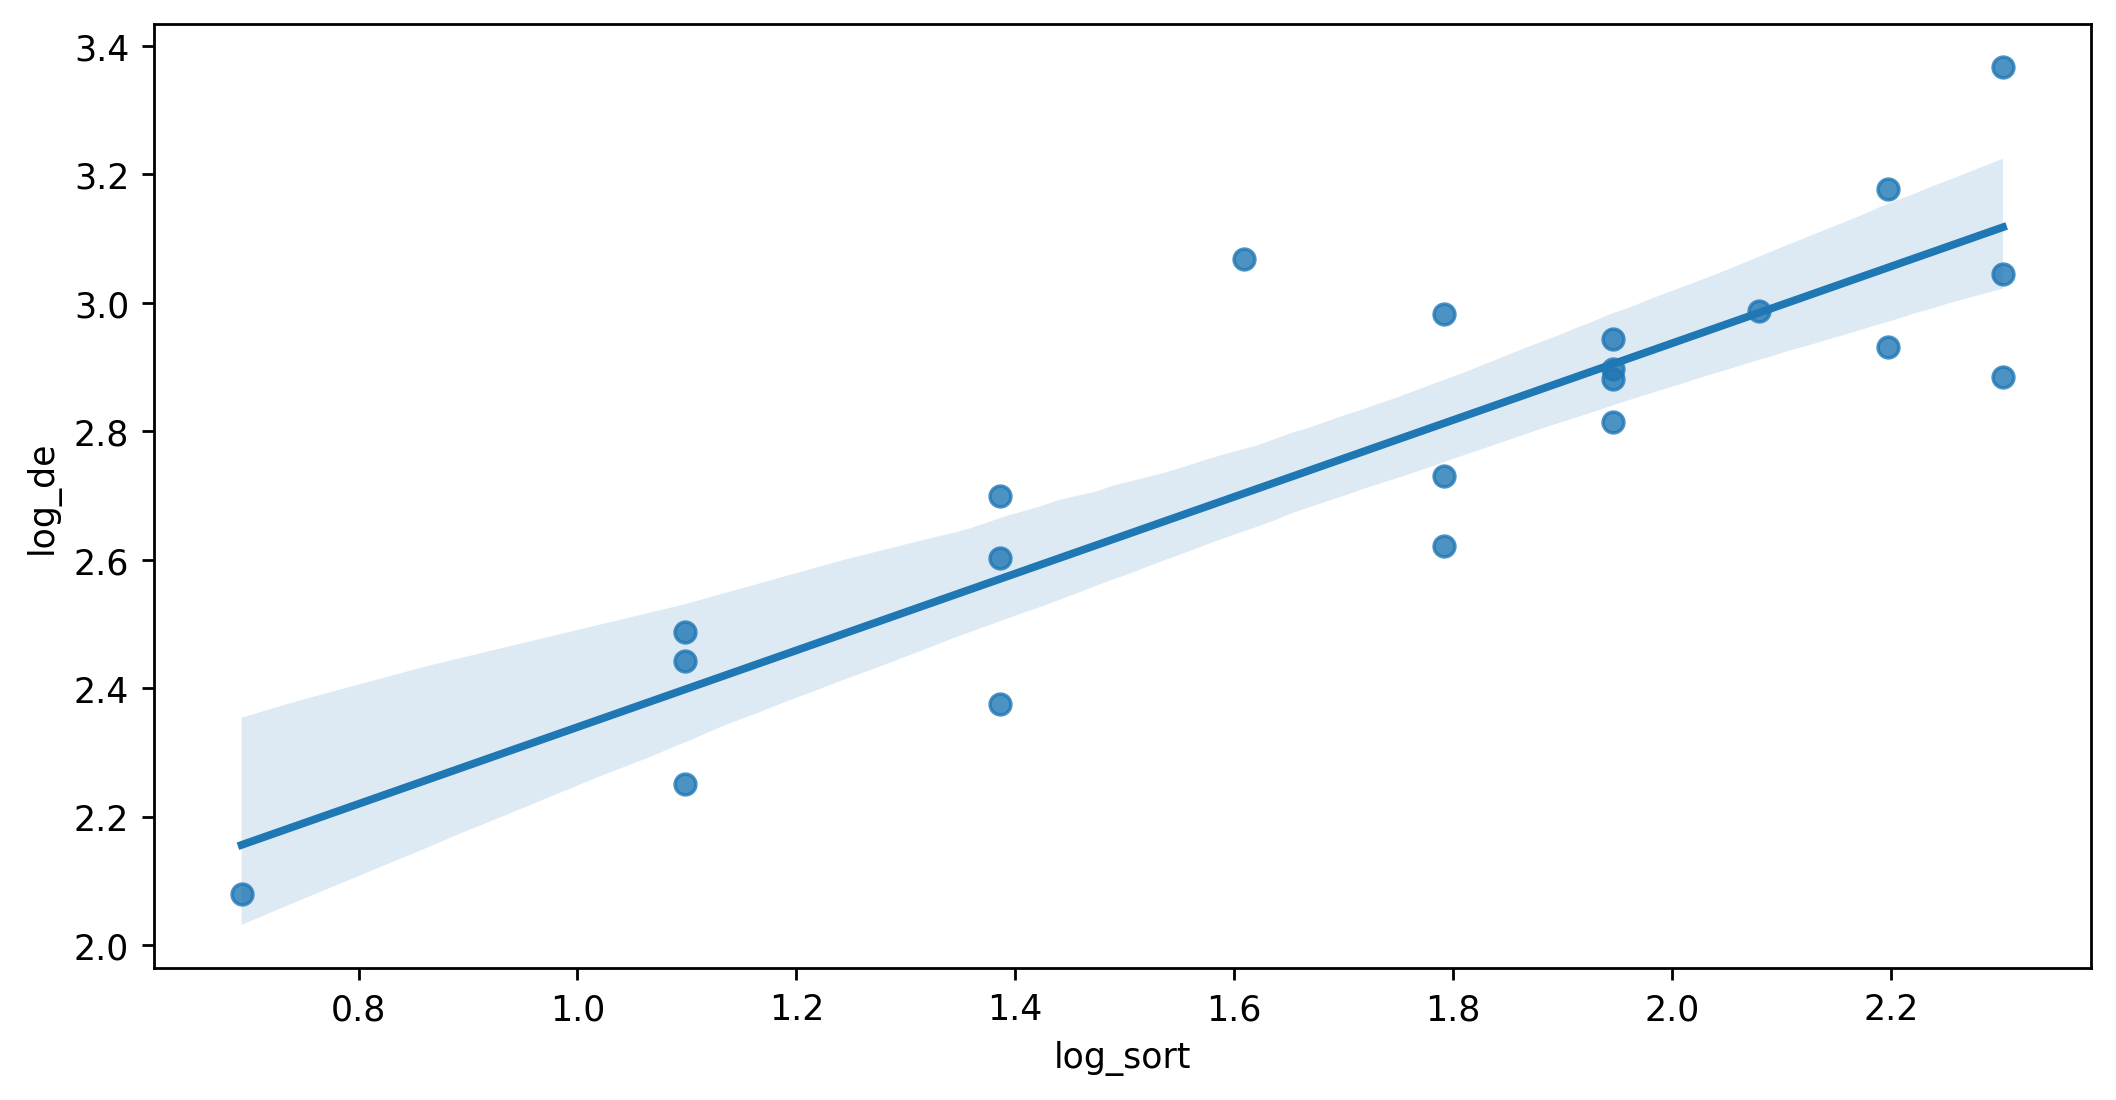

In [97]:
sns.regplot(x = df['log_sort'], y =df['log_de'],data = df);

In [98]:
#r2 for this model is 77% which is good than other model.

# Salary_hike -> Build a prediction model for Salary_hike

In [100]:
df = pd.read_csv("C:\\Users\\sneha\\Downloads\\Salary_Data.csv")

In [101]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [102]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [103]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

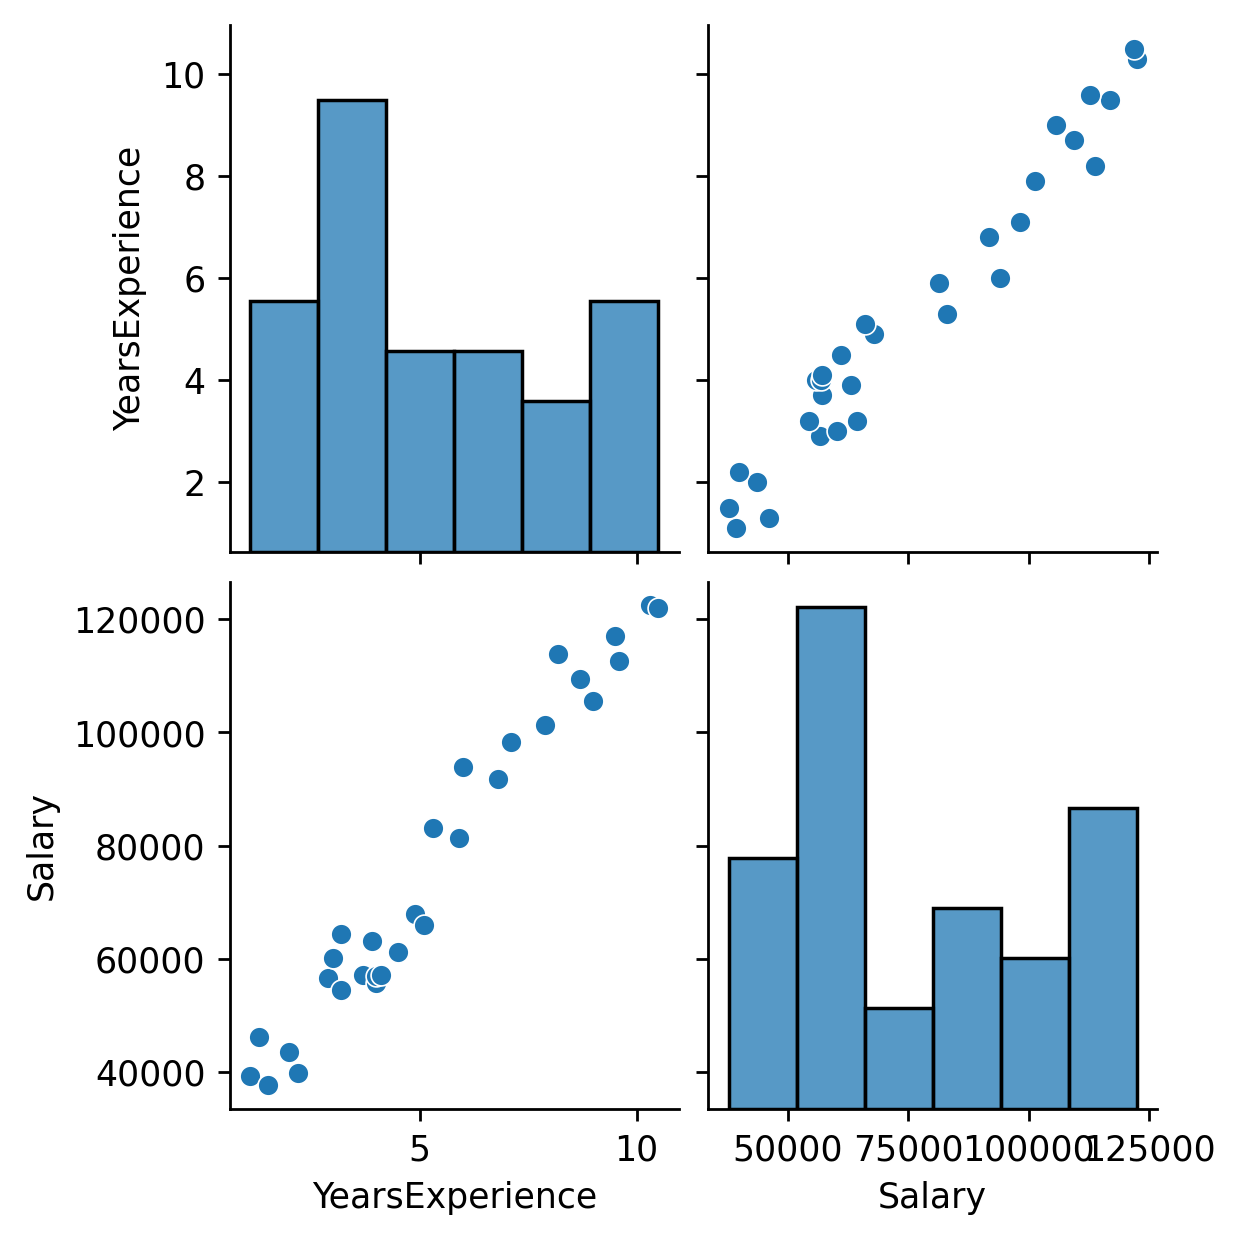

In [114]:
sns.pairplot(df);

In [104]:
df.duplicated().sum()

0

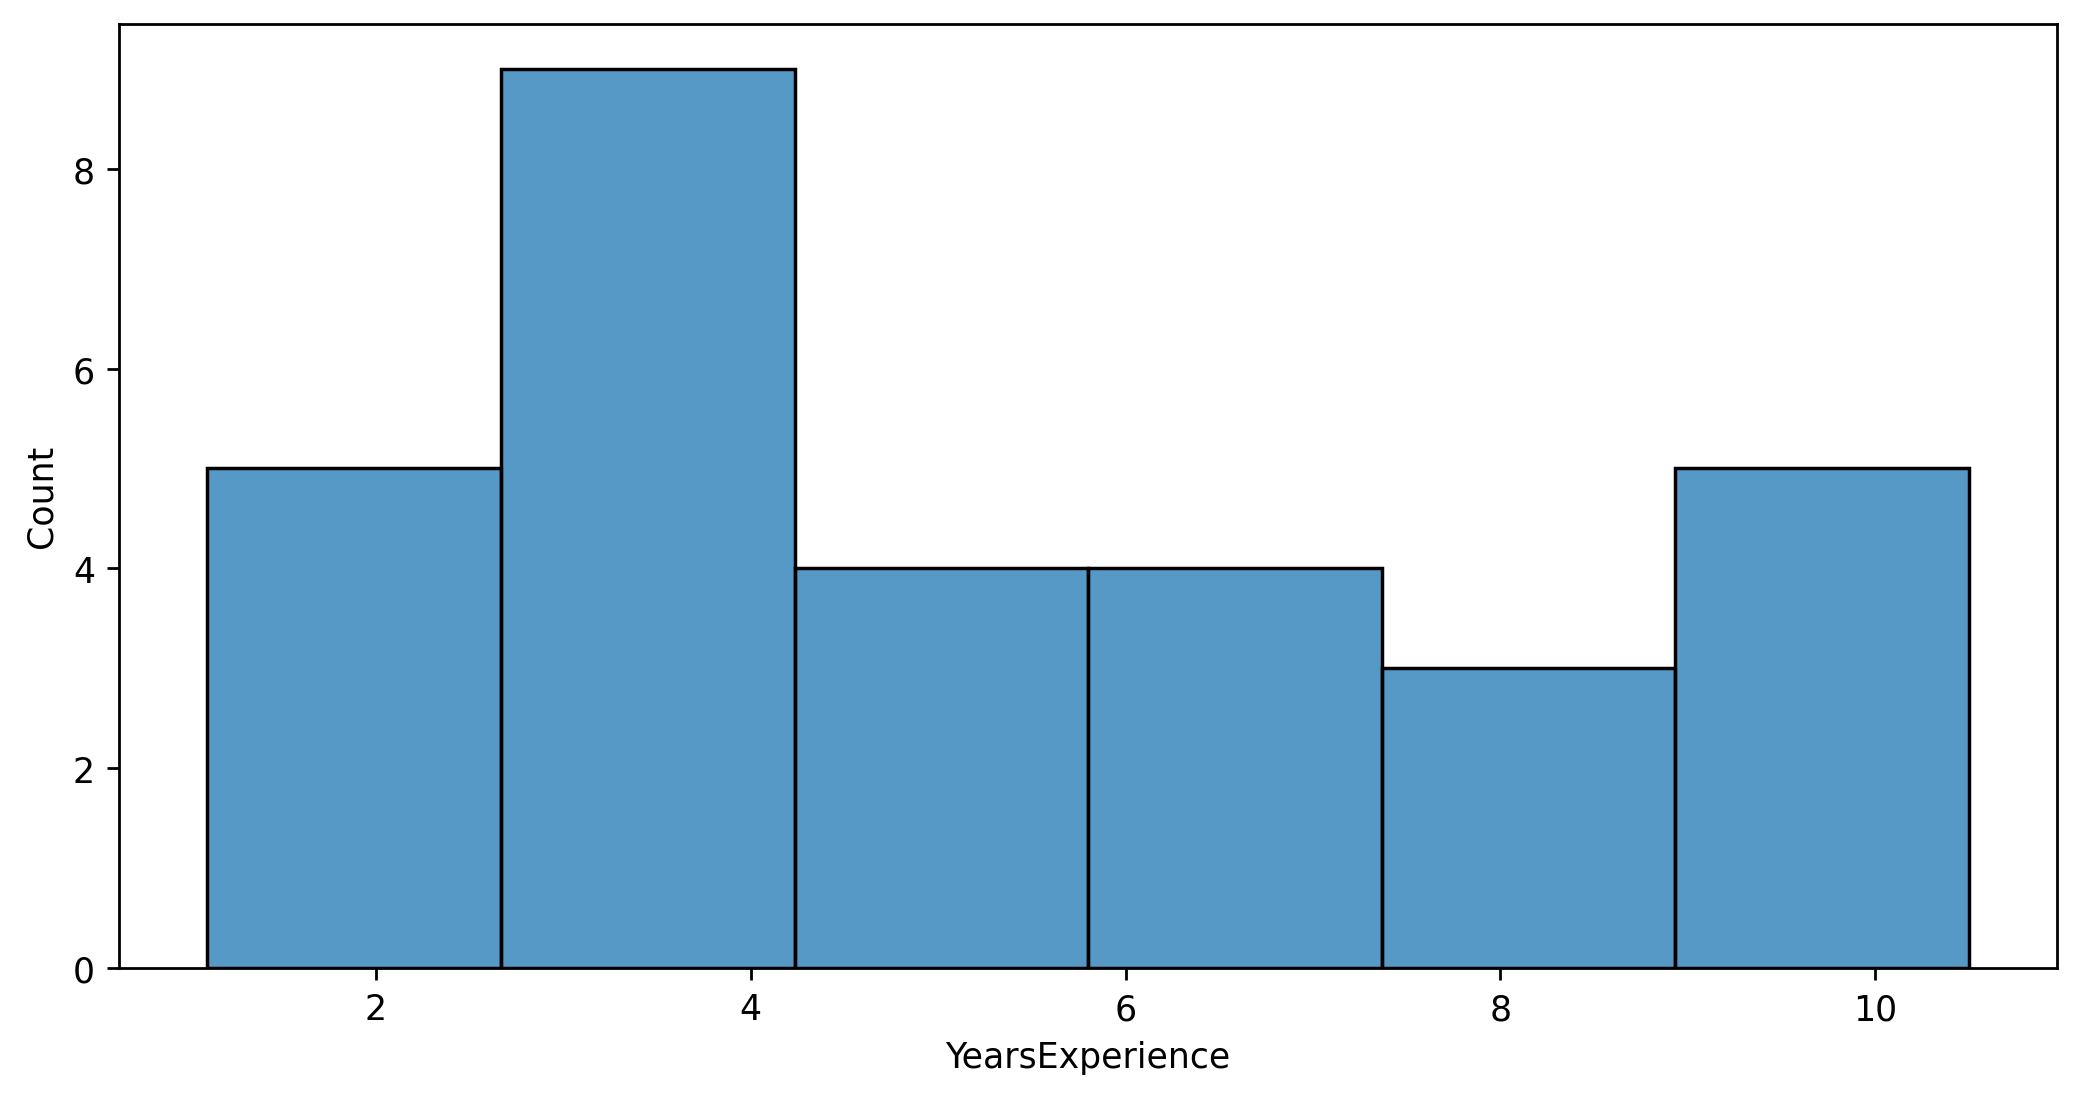

In [115]:
sns.histplot(df['YearsExperience']);

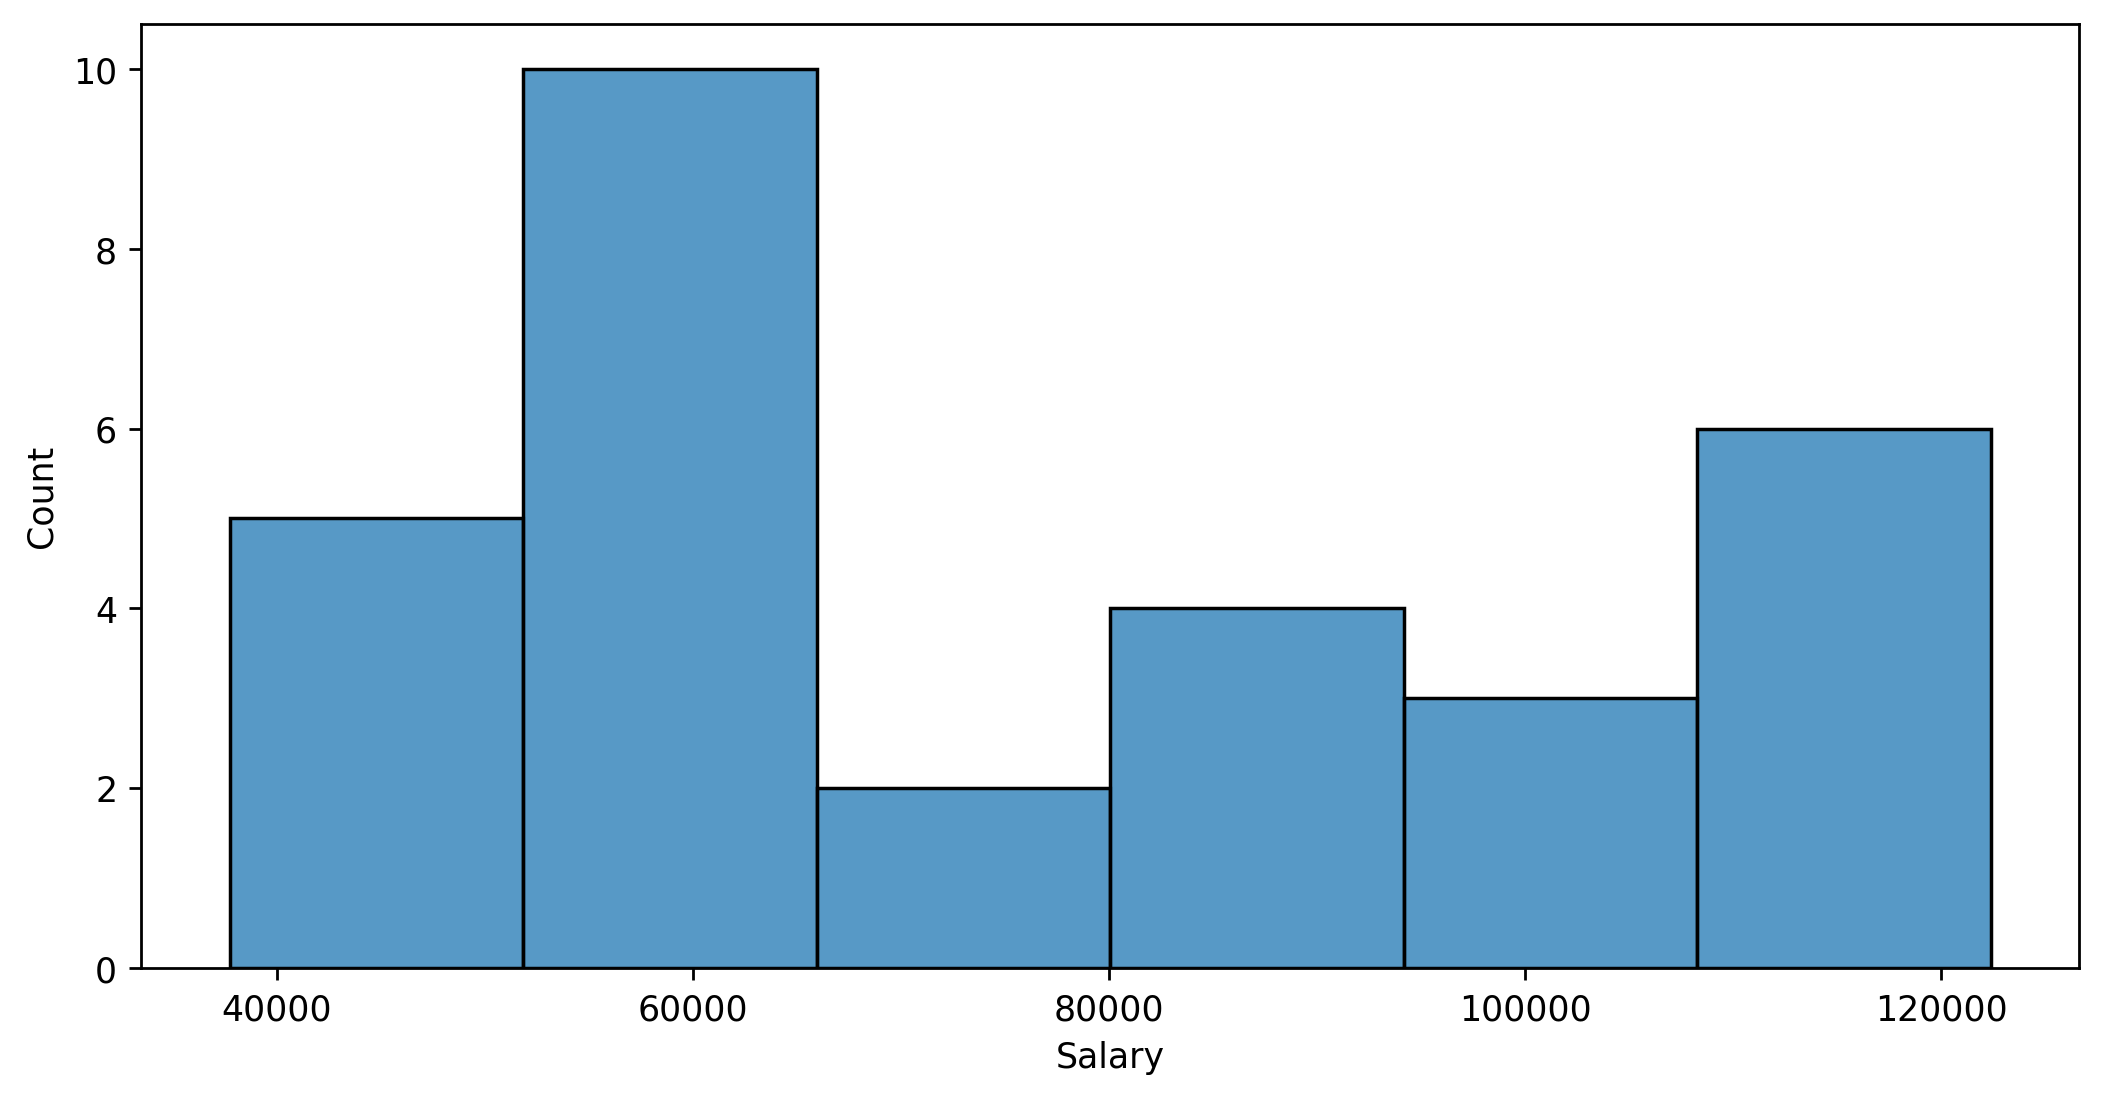

In [116]:
sns.histplot(df['Salary']);

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
sc= StandardScaler()

In [111]:
scaled_df = pd.DataFrame(sc.fit_transform(df), columns = df.columns)

In [124]:
scaled_df.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [117]:
model_sal = smf.ols('Salary~YearsExperience', data = scaled_df).fit()

In [118]:
model_sal.params

Intercept         -6.938894e-18
YearsExperience    9.782416e-01
dtype: float64

In [119]:
model_sal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        23:53:46   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.939e-18      0.039  -1.77e-16      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
#r2 for this model is 95%

In [122]:
model_sal.predict(df['YearsExperience'])

0      1.076066
1      1.271714
2      1.467362
3      1.956483
4      2.152132
5      2.836901
6      2.934725
7      3.130373
8      3.130373
9      3.619494
10     3.815142
11     3.912966
12     3.912966
13     4.010791
14     4.402087
15     4.793384
16     4.989032
17     5.184681
18     5.771626
19     5.869450
20     6.652043
21     6.945515
22     7.728109
23     8.021581
24     8.510702
25     8.804175
26     9.293295
27     9.391120
28    10.075889
29    10.271537
dtype: float64